In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

In [2]:
def rand_group_b(group_b, val_group_a,val_group_b,size,n=80):
    sd =np.sqrt(group_b*(1-group_b)/n)
    sample_b = np.random.normal(group_b,sd,size)
    employment =val_group_b*sample_b + val_group_a*(1-sample_b)
    return sample_b,employment


def mean_4_8_4(val):
    v = val.rolling(4).mean() 
    v = (v.shift(12) + v)/2
    return v

def mean_by_year(times,val):
    if isinstance(val, pd.Series):
        v = val.groupby(times).mean()
    elif isinstance(val,list):
        v=np.array(val)
        v= list(val.reshape((len(val)//12,12)).mean(axis=1))
    elif isinstance(val, np.ndarray):
         v= list(val.reshape((len(val)//12,12)).mean(axis=1))
    else:
        raise ValueError('val must be pd.Series or list or np.ndarray')
    t =list(times.to_period('Y').unique().astype(str))
    return t,v
        

In [3]:
d_sample = dict(color='#00B0F0',linestyle=':',marker="." ,label=get_display('ללא פקידות חוזרות'),alpha=0.8)
d_4_8_4 = dict(color='#0070C0',linestyle='dashed',marker=".",label=get_display('פקידות חוזרות (שיטת 4-8-4)'))
d_real = dict(color='r',linestyle='--', marker=".", label=get_display('במציאות'))


$\hat{p}_b \sim N(p_b,\frac{SD}{\sqrt{N}})$

$SD = \sqrt{p_b(1-p_b)}$

$N=80$

In [29]:
n=80
group_b =0.15
y_base_a =40
y_base_b = 80
employment_real =y_base_a* (1-group_b) + y_base_b*group_b
start='01-01-2013'
end='12-10-2023'
times = pd.period_range(start=start, end=end, freq='M').to_timestamp()
t = len(times)
x =times[24:]
y_real = np.array([employment_real]*len(times))

In [30]:
def plot_sample_484(ax,
                    x,
                    y_sample
                    ,y_484,
                    y_real,
                    d_sample:dict,
                   d_4_8_4:dict,
                   d_real:dict):
    
    ax.plot(x,y_sample,**d_sample)
    ax.plot(x,y_484 ,**d_4_8_4)
    ax.plot(x,y_real,**d_real)
    ax.tick_params(axis='x',rotation=90)
    ax.grid(axis = 'y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [31]:
def plot_sample_484_yearly(ax,
                    x,
                    y_sample
                    ,y_484,
                    y_real,
                    d_sample:dict,
                   d_4_8_4:dict,
                   d_real:dict):
    
    ax.plot(*mean_by_year(x,y_sample),**d_sample)
    ax.plot(*mean_by_year(x,y_484) ,**d_4_8_4)
    ax.plot(*mean_by_year(x,y_real),**d_real)
    ax.tick_params(axis='x',rotation=90)
    ax.grid(axis = 'y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [32]:
np.random.seed(0)
b_sample,y_sample =  rand_group_b(group_b, y_base_a,y_base_b, t)
y_484 = mean_4_8_4(pd.Series(y_sample)).to_numpy()

In [36]:
x

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=108, freq='MS')

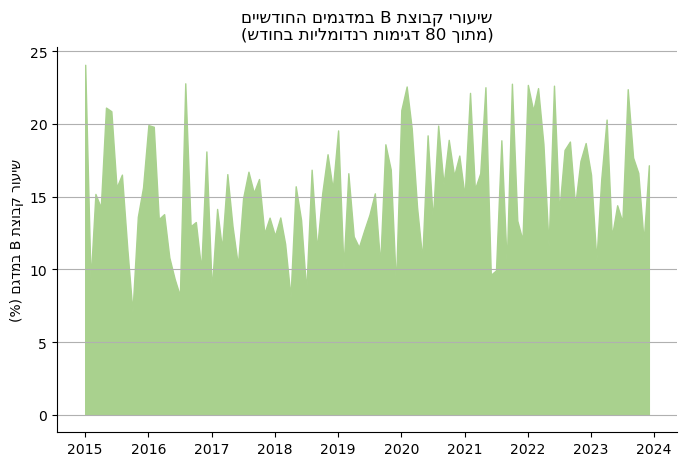

In [55]:
fig, ax = plt.subplots(1,1,figsize=(8,5), sharex=True, sharey=True)

ax.fill_between(x, b_sample[24:]*100,color ='#A9D18E')
ax.grid(axis = 'y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
title1 = get_display('שיעורי קבוצת B במדגמים החודשיים')
title2 = get_display('(מתוך 80 דגימות רנדומליות בחודש)')
ax.set_ylabel(get_display('שיעור קבוצת B במדגם (%)'))
ax.set_title(title1 + '\n' +title2)
plt.show()

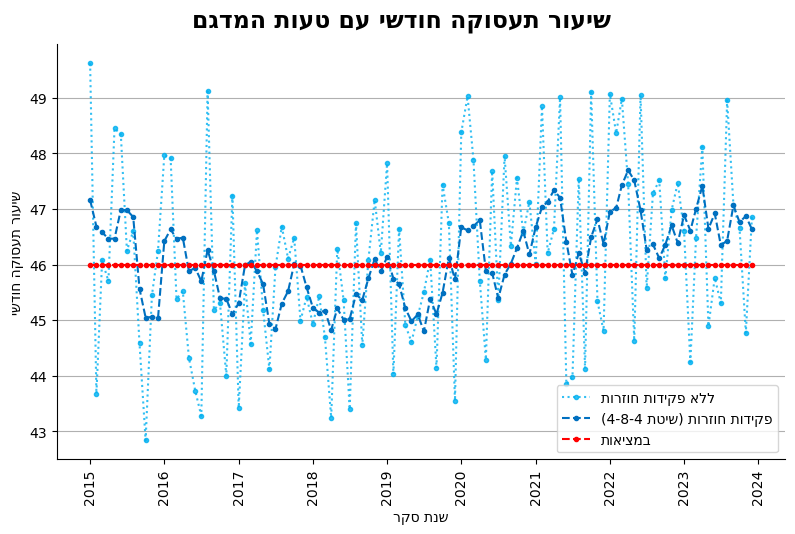

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,5), sharex=True, sharey=True)


plot_sample_484(ax,x,
                y_sample[24:],y_484[24:], y_real[24:],
                d_sample,d_4_8_4, d_real)

plt.subplots_adjust(left=0.07, right=0.98, bottom=0.08, top=0.91, hspace=0.05, wspace=0.05)      
ax.set_xlabel(get_display('שנת סקר'))
ax.set_ylabel(get_display('שיעור תעסוקה חודשי'))
fig.suptitle(get_display('שיעור תעסוקה חודשי עם טעות המדגם'),fontsize=17,fontweight ="bold")
plt.legend(loc='best')

plt.show()

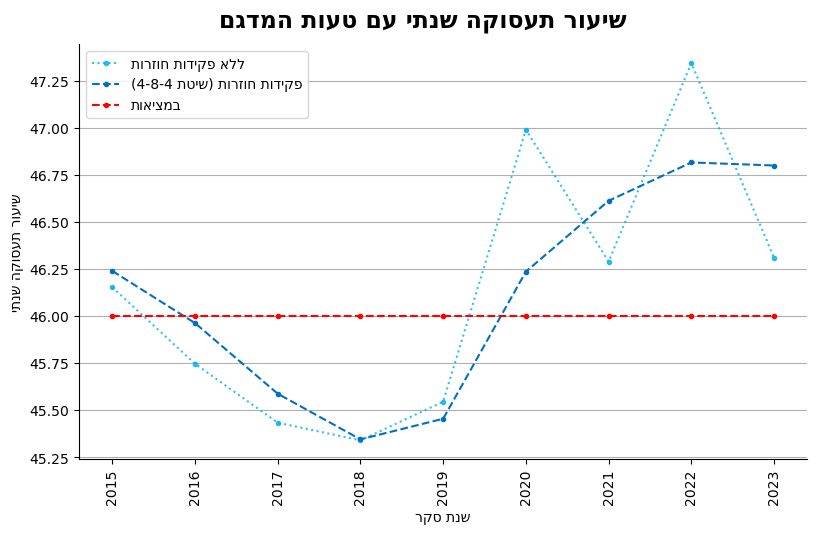

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,5), sharex=True, sharey=True)


plot_sample_484_yearly(ax,x,
                y_sample[24:],y_484[24:], y_real[24:],
                d_sample,d_4_8_4, d_real)

      
plt.subplots_adjust(left=0.07, right=0.98, bottom=0.08, top=0.91, hspace=0.05, wspace=0.05)    
  
ax.set_xlabel(get_display('שנת סקר'))
ax.set_ylabel(get_display('שיעור תעסוקה שנתי'))
fig.suptitle(get_display('שיעור תעסוקה שנתי עם טעות המדגם'),fontsize=17,fontweight ="bold")
plt.legend(loc='best')

plt.show()

TypeError: matplotlib.axes._axes.Axes.plot() got multiple values for keyword argument 'marker'

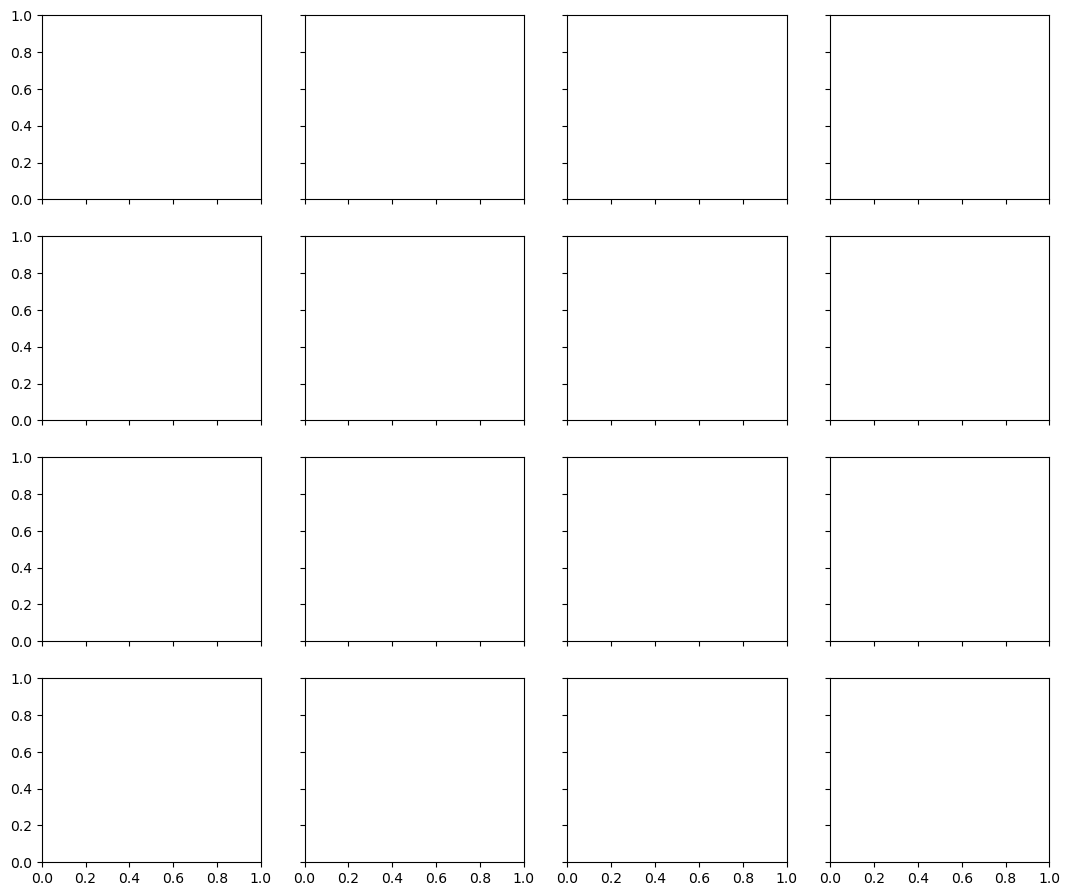

In [10]:
ncols = 4
nrows = 4

n=80
employment_real =y_base_a* (1-group_b) + y_base_b*group_b


start='01-01-2013'
end='12-31-2023'
times = pd.period_range(start=start, end=end, freq='M').to_timestamp()
t = len(times)
y_real = np.array([employment_real]*len(times))

fig, axs = plt.subplots(nrows,ncols,figsize=(13,11), sharex=True, sharey=True)
x =times[24:]
k=0
for i in range(nrows):
    for j in range(ncols):
        np.random.seed(k)
        
        _,y =  rand_group_b(group_b, y_base_a,y_base_b, t)

        y_484 = mean_4_8_4(pd.Series(y)).to_numpy()[24:]
        ax = axs[i, j]
        
        

        ax.plot(*mean_by_year(x,y[24:]),label=get_display('ללא פקידות חוזרות'), marker=".",**d_sample)
        ax.plot(*mean_by_year(x,y_484),label=get_display('פקידות חוזרות (שיטת 4-8-4)'),marker=".",**d_4_8_4)
        ax.plot(*mean_by_year(x,y_real[24:]),label=get_display('במציאות'),marker=".",**d_real)
        ax.tick_params(axis='x',rotation=90)
        ax.grid(axis = 'y')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        k+= 1
        ax.text(0.5, 0.9,   str(k) +get_display(' ניסוי '), fontsize=14 ,transform=ax.transAxes)         

plt.subplots_adjust(left=0.07, right=0.98, bottom=0.08, top=0.91, hspace=0.05, wspace=0.05)    
  
fig.supxlabel(get_display('שנת סקר'))
fig.supylabel(get_display('שיעור תעסוקה שנתי'))
fig.suptitle(get_display('שיעור תעסוקה עם טעות המדגם \n סדרת ניסויים'),fontsize=17,fontweight ="bold")
plt.legend(loc='best')

plt.show()

In [ ]:
ncols = 4
nrows = 4


n=80
group_b =0.15
y_base_a =40
y_base_b = 80
employment_real =y_base_a* (1-group_b) + y_base_b*group_b


start='01-01-2013'
end='12-31-2023'
times = pd.period_range(start=start, end=end, freq='M').to_timestamp()
t = len(times)
y_real = np.array([employment_real]*len(times))

fig, axs = plt.subplots(nrows,ncols,figsize=(13,11), sharex=True, sharey=True)
x =times[24:]

shock = np.ones(11*12)

shock[75:77] =0.97
shock[107:109] =1.03

k=0
for i in range(nrows):
    for j in range(ncols):
        np.random.seed(k)
        
        _,y_sample =  rand_group_b(group_b, y_base_a,y_base_b, t)
        y_sample = y_sample *shock

        y_484 = mean_4_8_4(pd.Series(y_sample)).to_numpy()
        ax = axs[i, j]

        plot_sample_484_yearly(ax,x,
                y_sample[24:],y_484[24:], y_real[24:],
                d_sample,d_4_8_4, d_real)
        
        k+= 1
        ax.text(0.5, 0.9,   str(k) +get_display(' ניסוי '), fontsize=14 ,transform=ax.transAxes)         

plt.subplots_adjust(left=0.07, right=0.98, bottom=0.08, top=0.91, hspace=0.05, wspace=0.05)    
  
fig.supxlabel(get_display('שנת סקר'))
fig.supylabel(get_display('שיעור תעסוקה שנתי'))
fig.suptitle(get_display('שיעור תעסוקה עם טעות המדגם \n סדרת ניסויים'),fontsize=17,fontweight ="bold")
plt.legend(loc='best')

plt.show()

In [ ]:
shock = np.ones(8*12)
shock[39:41] =1.01
shock[50] =0.98
shock[74:76] =0.99
shock[89:91] =1.01
x =times[36:]

start='01-01-2014'
end='12-10-2023'
times = pd.period_range(start=start, end=end, freq='M').to_timestamp()
t = len(times)
ncols = 3
nrows = 2


fig, axs = plt.subplots(nrows,ncols,figsize=(12,6),sharex=True,squeeze=False)
x =times[24:]
y_real = np.array([employment_real]*len(x))
k=0
for i in range(nrows):
    for j in range(ncols):
        if i == 0:
            n=80
        else:
            n=1500
        np.random.seed(k)
        _,y_sample =  rand_group_b(group_b, y_base_a,y_base_b,  t,n)
        y_484 = mean_4_8_4(pd.Series(y_sample)).to_numpy()[24:] 
        ax = axs[i, j]
        
        
        plot_sample_484(ax,x,
                y_sample[24:] *shock,y_484 *shock, y_real*shock,
                d_sample,d_4_8_4, d_real)

        
        k+= 1
        ax.text(0.5, 0.8,  str(k) +get_display(' ניסוי '), fontsize=14 ,transform=ax.transAxes)
        
        if i == 0:
            ax.set_ylim(41,51)
            if j==1:
                ax.set_title(get_display("כישלון במדגמים קטנים (N=60)"),fontsize=15)
        else:
            ax.set_ylim(44,48)
            if j==1:
                ax.set_title(get_display("הצלחה במדגמים גדולים (N=1,600)"),fontsize=15)


plt.legend(loc='lower center')
plt.subplots_adjust(left=0.07, right=0.95, bottom=0.12, top=0.89, hspace=0.2, wspace=0.1)    
fig.supxlabel(get_display('שנת סקר'),fontsize=15)
fig.supylabel(get_display('שיעור תעסוקה חודשי'),fontsize=15)
fig.suptitle(get_display('יכולת לזהות שינויים קלים אמיתיים'),fontsize=17,fontweight ="bold")

plt.show()
